# Capacity Test

In [3]:
# Data Analysis
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Utilities
import numpy as np
# from tqdm import tnrange
import pickle
import os
from tqdm import tqdm_notebook as tqdmn
# import warnings

In [2]:
%config InlineBackend.figure_format = 'retina'

In [104]:
l = [1, 2]
np.mean(l)

1.5

In [ ]:
nominal_rates_min = np.arange(10, 110, 10)
rep = 2
duration = 60

throughput = []
response_time = []
request_rate = []

for rate_min in nominal_rates_min:
    
    print()
    
    request_rate_avg = []    
    response_time_avg = []
    throughput_avg = []
    
    for i in np.arange(2, rep+1):

        df = pd.read_csv('dataset/' + str(rate_min) + 'k_0' + str(i) + '.jtl')

        tot_req = df.shape[0]
        print('Total requests:', tot_req)

        nominal_rate = rate_min*1000/60 
        print('Nominal request rate:', nominal_rate)

    #     duration = (df.timeStamp[df.shape[0]-1]-df.timeStamp[0])/1000
        actual_rate = tot_req/duration
        print('Actual request rate:', actual_rate)

        err = (df['success'] == False).sum()
        print('Errors:', err, '(' + str(err/tot_req*100) + ' %)')

        elaps = df.loc[df['success']==True, 'elapsed'].mean()
        print('Avg elapsed time:', elaps)

        tp = (tot_req-err)/60       
        print('Throughput:', tp)

        print()
        
        request_rate_avg.append(actual_rate)
        response_time_avg.append(elaps)
        throughput_avg.append(tp)
    
    print('------------------------------------------')
    print()
        
#     request_rate.append(nominal_rate)
    request_rate.append(np.mean(request_rate_avg))
    response_time.append(np.mean(response_time_avg))
    throughput.append(np.mean(throughput_avg))


Total requests: 10055
Nominal request rate: 166.66666666666666
Actual request rate: 167.58333333333334
Errors: 0 (0.0 %)
Avg elapsed time: 2.554549975136748
Throughput: 167.58333333333334

------------------------------------------


Total requests: 20049
Nominal request rate: 333.3333333333333
Actual request rate: 334.15
Errors: 0 (0.0 %)
Avg elapsed time: 2.502768217866228
Throughput: 334.15

------------------------------------------


Total requests: 29874
Nominal request rate: 500.0
Actual request rate: 497.9
Errors: 0 (0.0 %)
Avg elapsed time: 3.3830755841199704
Throughput: 497.9

------------------------------------------




C:\Users\fabio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total requests: 39963
Nominal request rate: 666.6666666666666
Actual request rate: 666.05
Errors: 10 (0.025023146410429645 %)
Avg elapsed time: 3.4644457237253774
Throughput: 665.8833333333333

------------------------------------------


Total requests: 49836
Nominal request rate: 833.3333333333334
Actual request rate: 830.6
Errors: 583 (1.1698370655750863 %)
Avg elapsed time: 4.389133656833086
Throughput: 820.8833333333333

------------------------------------------


Total requests: 59454
Nominal request rate: 1000.0
Actual request rate: 990.9
Errors: 927 (1.559188616409325 %)
Avg elapsed time: 5.266424043603807
Throughput: 975.45

------------------------------------------


Total requests: 69008
Nominal request rate: 1166.6666666666667
Actual request rate: 1150.1333333333334
Errors: 2707 (3.9227335961047993 %)
Avg elapsed time: 10.434292092125308
Throughput: 1105.0166666666667

------------------------------------------




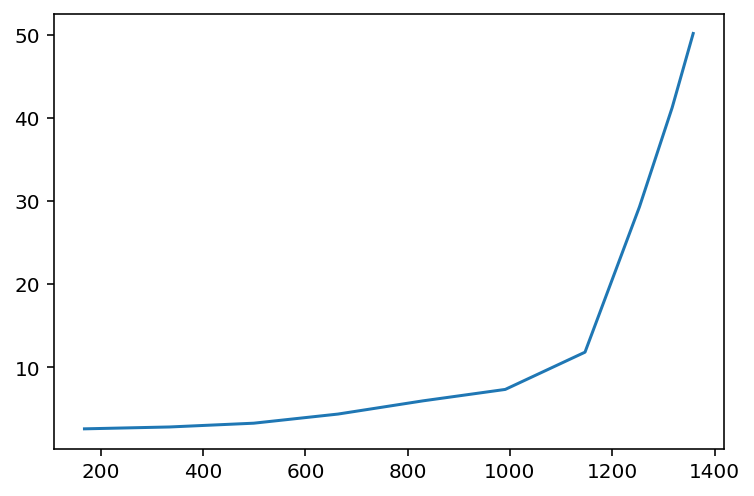

In [127]:
plt.plot(request_rate, response_time)

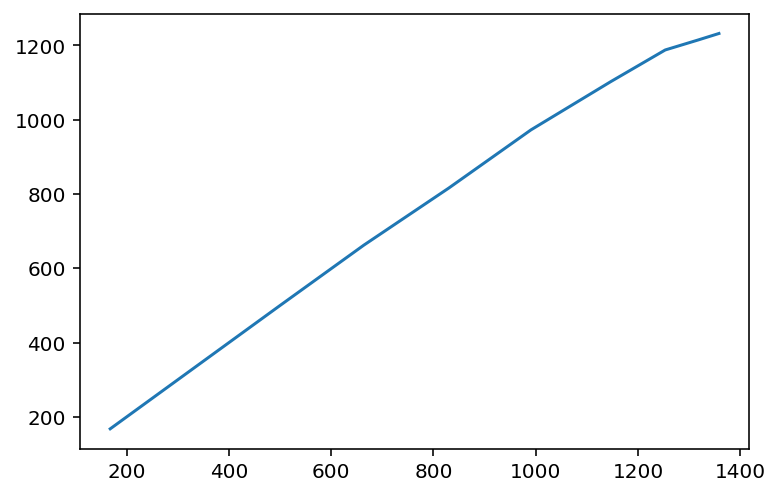

In [128]:
plt.plot(request_rate, throughput)

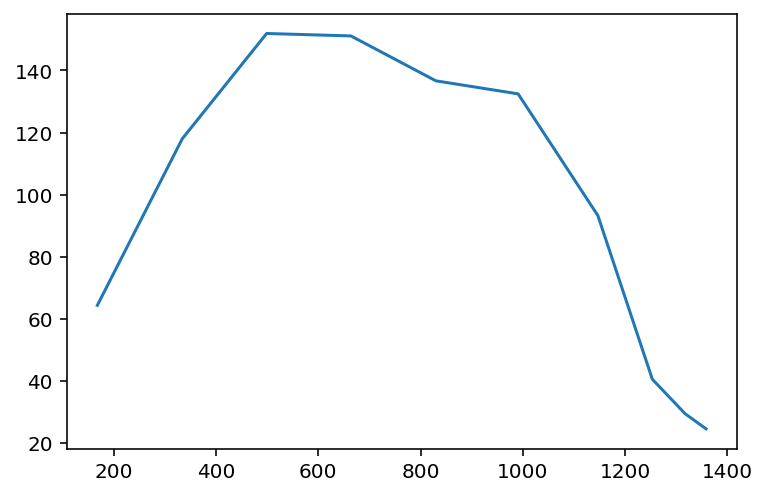

In [129]:
power = [throughput[i]/response_time[i] for i in range(len(throughput))]

plt.plot(request_rate, power)